# dont-get-kicked

Use the "Run" button to execute the code.

In [42]:
!pip install jovian --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
!pip install scikit-learn

In [ ]:
!pip install pandas numpy matplotlib seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

In [3]:
vehicle_df = pd.read_csv('training.csv')

In [4]:
vehicle_df

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,1.0,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.0,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,1.0,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2.0,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,73010,1,12/2/2009,ADESA,2001,8,MERCURY,SABLE,GS,4D SEDAN GS,BLACK,AUTO,1.0,Alloy,45234,AMERICAN,MEDIUM,FORD,1996.0,2993.0,2656.0,3732.0,2190.0,3055.0,4836.0,5937.0,NaN,NaN,18111,30212,GA,4200.0,0,993
72979,73011,0,12/2/2009,ADESA,2007,2,CHEVROLET,MALIBU 4C,LS,4D SEDAN LS,SILVER,AUTO,NaN,NaN,71759,AMERICAN,MEDIUM,GM,6418.0,7325.0,7431.0,8411.0,6785.0,8132.0,10151.0,11652.0,NaN,NaN,18881,30212,GA,6200.0,0,1038
72980,73012,0,12/2/2009,ADESA,2005,4,JEEP,GRAND CHEROKEE 2WD V,Lar,4D WAGON LAREDO,SILVER,AUTO,1.0,Alloy,88500,AMERICAN,MEDIUM SUV,CHRYSLER,8545.0,9959.0,9729.0,11256.0,8375.0,9802.0,11831.0,14402.0,NaN,NaN,18111,30212,GA,8200.0,0,1893
72981,73013,0,12/2/2009,ADESA,2006,3,CHEVROLET,IMPALA,LS,4D SEDAN LS,WHITE,AUTO,1.0,Alloy,79554,AMERICAN,LARGE,GM,6420.0,7604.0,7434.0,8712.0,6590.0,7684.0,10099.0,11228.0,NaN,NaN,18881,30212,GA,7000.0,0,1974


## Exploratory Analysis and Visualization

In [ ]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission                       72974 non-null  obj

### As PRIMEUNIT and AUCGUART have around 95% of the values missing so these columns won't be helpful in training the model, rather slow it down so we remove these columns.

In [5]:
vehicle_df.drop(columns=['PRIMEUNIT', 'AUCGUART'], inplace=True)

In [ ]:
vehicle_df.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72983.000000,69814.000000,72983.000000,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,36511.428497,0.122988,2005.343052,4.176644,1.494299,71499.995917,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,26345.842155,58043.059945,6730.934326,0.025280,1276.580985
std,21077.241302,0.328425,1.731252,1.712210,0.521290,14578.913128,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,25717.351219,26151.640415,1767.846435,0.156975,598.846788
min,1.000000,0.000000,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,18257.500000,0.000000,2004.000000,3.000000,1.000000,61837.000000,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,17212.000000,32124.000000,5435.000000,0.000000,837.000000
50%,36514.000000,0.000000,2005.000000,4.000000,1.000000,73361.000000,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,19662.000000,73108.000000,6700.000000,0.000000,1155.000000
75%,54764.500000,0.000000,2007.000000,5.000000,2.000000,82436.000000,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000
max,73014.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,45469.000000,1.000000,7498.000000


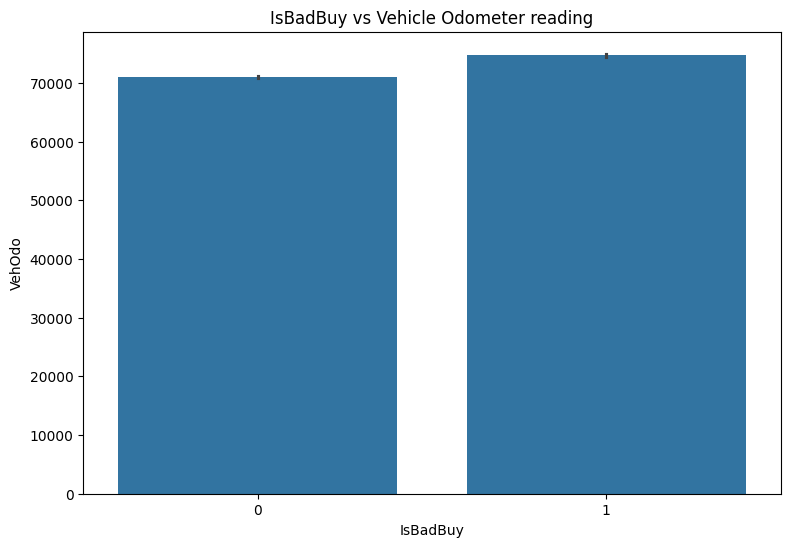

In [ ]:
#plt.rcParams['figure.figsize'] = (9, 6)
plt.title('IsBadBuy vs Vehicle Odometer reading')
sns.barplot(x='IsBadBuy', y='VehOdo', data=vehicle_df);

### It seems odometer reading has slight effect on target variable, if reading is higher than 70000 then it is likely to be a kick.

In [ ]:
px.histogram(x='WheelType', data_frame=vehicle_df, color='IsBadBuy', title= 'WheelType vs IsBadBuy')


In [ ]:
vehicle_df.IsOnlineSale.value_counts()

IsOnlineSale
0    71138
1     1845
Name: count, dtype: int64

In [ ]:
px.histogram(x='IsOnlineSale', data_frame=vehicle_df, color='IsBadBuy', width=1100, height=600, title= 'Online Sale vs IsBadBuy').update_layout(bargap=0.2)

### This is class imbalance so we can't deduce much from this visualization.

In [ ]:
px.violin(x='IsBadBuy', y= 'MMRAcquisitionAuctionAveragePrice', data_frame=vehicle_df, title='MMRAquisitionAuctionAveragePrice vs IsBadBuy',  width=1100, height=600)

### This shows the ones auctioned at high price are more likely to be a badbuy.

In [ ]:
px.violin(x='IsBadBuy', y= 'MMRCurrentAuctionAveragePrice', data_frame= vehicle_df, title='MMRCurrentAuctionAveragePrice vs IsBadBuy',  width=1100, height=600)

## Feature Engineering & Data Preparation and Cleaning

In [6]:
input_cols = vehicle_df.columns.to_list()[2:]
target_col = 'IsBadBuy'

In [ ]:
input_cols

['PurchDate',
 'Auction',
 'VehYear',
 'VehicleAge',
 'Make',
 'Model',
 'Trim',
 'SubModel',
 'Color',
 'Transmission',
 'WheelTypeID',
 'WheelType',
 'VehOdo',
 'Nationality',
 'Size',
 'TopThreeAmericanName',
 'MMRAcquisitionAuctionAveragePrice',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentAuctionCleanPrice',
 'MMRCurrentRetailAveragePrice',
 'MMRCurrentRetailCleanPrice',
 'BYRNO',
 'VNZIP1',
 'VNST',
 'VehBCost',
 'IsOnlineSale',
 'WarrantyCost']

In [7]:
input_df = vehicle_df[input_cols].copy()
targets = vehicle_df[target_col].copy()

In [ ]:
input_df

,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,1.0,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,21973,33619,FL,7100.0,0,1113
1,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,19638,33619,FL,7600.0,0,1053
2,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.0,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,19638,33619,FL,4900.0,0,1389
3,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,1.0,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,19638,33619,FL,4100.0,0,630
4,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2.0,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,19638,33619,FL,4000.0,0,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,12/2/2009,ADESA,2001,8,MERCURY,SABLE,GS,4D SEDAN GS,BLACK,AUTO,1.0,Alloy,45234,AMERICAN,MEDIUM,FORD,1996.0,2993.0,2656.0,3732.0,2190.0,3055.0,4836.0,5937.0,18111,30212,GA,4200.0,0,993
72979,12/2/2009,ADESA,2007,2,CHEVROLET,MALIBU 4C,LS,4D SEDAN LS,SILVER,AUTO,NaN,NaN,71759,AMERICAN,MEDIUM,GM,6418.0,7325.0,7431.0,8411.0,6785.0,8132.0,10151.0,11652.0,18881,30212,GA,6200.0,0,1038
72980,12/2/2009,ADESA,2005,4,JEEP,GRAND CHEROKEE 2WD V,Lar,4D WAGON LAREDO,SILVER,AUTO,1.0,Alloy,88500,AMERICAN,MEDIUM SUV,CHRYSLER,8545.0,9959.0,9729.0,11256.0,8375.0,9802.0,11831.0,14402.0,18111,30212,GA,8200.0,0,1893
72981,12/2/2009,ADESA,2006,3,CHEVROLET,IMPALA,LS,4D SEDAN LS,WHITE,AUTO,1.0,Alloy,79554,AMERICAN,LARGE,GM,6420.0,7604.0,7434.0,8712.0,6590.0,7684.0,10099.0,11228.0,18881,30212,GA,7000.0,0,1974


In [ ]:
targets

0        0
1        0
2        0
3        0
4        0
        ..
72978    1
72979    0
72980    0
72981    0
72982    0
Name: IsBadBuy, Length: 72983, dtype: int64

In [ ]:
import jovian
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [ ]:
input_df.columns

Index(['PurchDate', 'Auction', 'VehYear', 'VehicleAge', 'Make', 'Model',
       'Trim', 'SubModel', 'Color', 'Transmission', 'WheelTypeID', 'WheelType',
       'VehOdo', 'Nationality', 'Size', 'TopThreeAmericanName',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'BYRNO',
       'VNZIP1', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost'],
      dtype='object')

In [ ]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PurchDate                          72983 non-null  object 
 1   Auction                            72983 non-null  object 
 2   VehYear                            72983 non-null  int64  
 3   VehicleAge                         72983 non-null  int64  
 4   Make                               72983 non-null  object 
 5   Model                              72983 non-null  object 
 6   Trim                               70623 non-null  object 
 7   SubModel                           72975 non-null  object 
 8   Color                              72975 non-null  object 
 9   Transmission                       72974 non-null  object 
 10  WheelTypeID                        69814 non-null  float64
 11  WheelType                          69809 non-null  obj

In [8]:
numeric_cols = ['VehicleAge', 'VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
                'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',
                'VNZIP1', 'VehBCost', 'WarrantyCost']

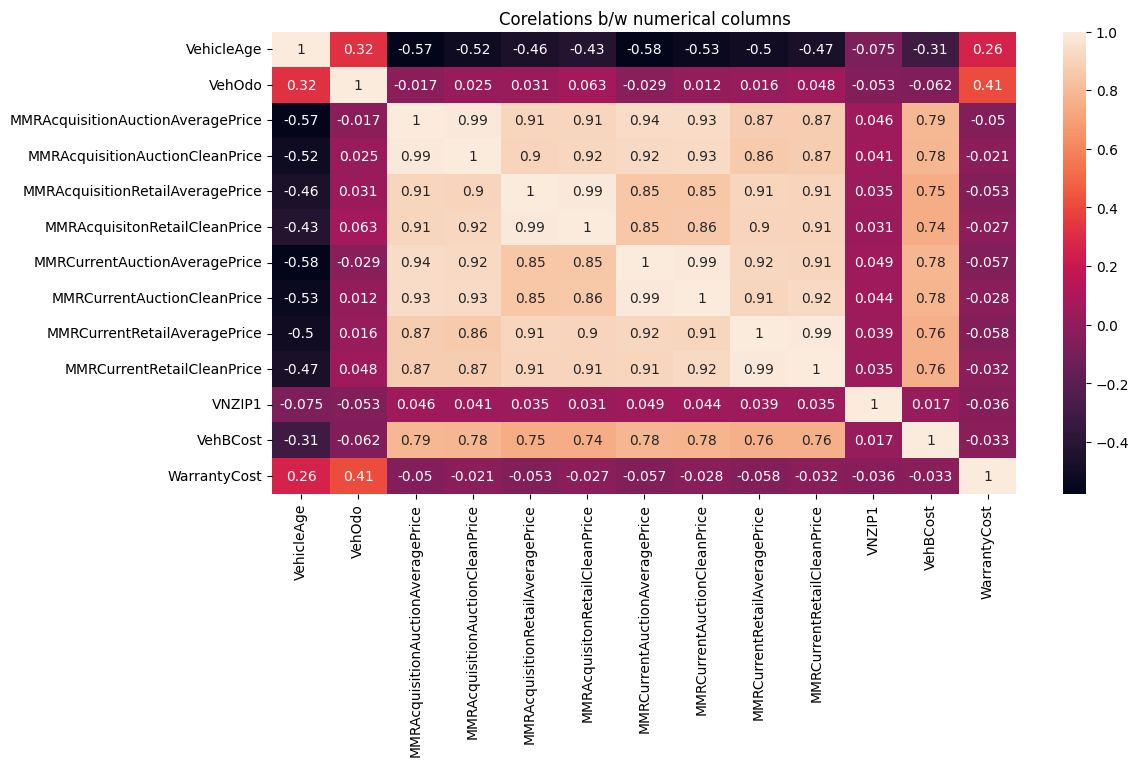

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Corelations b/w numerical columns')
sns.heatmap(input_df[numeric_cols].corr(), annot=True);

### We see that clean prices have very high corelation with other prices so they are not needed

In [9]:
input_df.drop(columns=['MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailCleanPrice'], inplace= True)

In [10]:
numeric_cols.remove('MMRAcquisitionAuctionCleanPrice')
numeric_cols.remove('MMRAcquisitonRetailCleanPrice')
numeric_cols.remove('MMRCurrentAuctionCleanPrice')
numeric_cols.remove('MMRCurrentRetailCleanPrice')

In [ ]:
input_df.Make.unique().shape

(33,)

In [ ]:
input_df.Model.unique().shape

(1063,)

In [ ]:
input_df.Trim.unique().shape

(135,)

In [ ]:
input_df.SubModel.unique().shape

(864,)

In [11]:
tooManyCategories = ['Color', 'Make', 'Model', 'SubModel', 'Trim', 'VNST']     #can't be oneHotEncoded as they have too many categories so that is curse off dimensionality
irrelevant = ['PurchDate', 'BYRNO', 'WheelTypeID', 'VehYear']          #no need for these as they don't have much significance

In [12]:
input_df.drop(columns=tooManyCategories, inplace=True)

In [13]:
input_df.drop(columns=irrelevant, inplace=True)

In [14]:
categorical_cols = ['Auction', 'Transmission', 'WheelType', 'Nationality',
                    'Size', 'TopThreeAmericanName', 'IsOnlineSale']

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
imputer = SimpleImputer(strategy= 'mean')

In [17]:
imputer.fit(input_df[numeric_cols])

SimpleImputer()

In [18]:
input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scalar = MinMaxScaler()

In [21]:
scalar.fit(input_df[numeric_cols])

MinMaxScaler()

In [22]:
input_df[numeric_cols] = scalar.transform(input_df[numeric_cols])

In [23]:
input_df.describe()

,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,MMRCurrentAuctionAveragePrice,MMRCurrentRetailAveragePrice,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,0.464072,0.601261,0.171572,0.217427,0.171661,0.224558,0.573078,0.148015,0.025280,0.115773
std,0.190246,0.131469,0.068912,0.080755,0.068006,0.078916,0.271114,0.038881,0.156975,0.085112
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.514122,0.119618,0.160722,0.119954,0.167605,0.304375,0.119513,0.000000,0.053297
50%,0.444444,0.618043,0.170707,0.216121,0.170091,0.223976,0.729256,0.147334,0.000000,0.098493
75%,0.555556,0.699879,0.217373,0.272518,0.216449,0.278838,0.800933,0.173727,0.000000,0.165009
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [26]:
input_df[categorical_cols] = input_df[categorical_cols].fillna('unknown')

In [27]:
encoder.fit(input_df[categorical_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [28]:
encoded_cols = list(encoder.get_feature_names_out())

In [ ]:
encoded_cols

['Auction_ADESA',
 'Auction_MANHEIM',
 'Auction_OTHER',
 'Transmission_AUTO',
 'Transmission_MANUAL',
 'Transmission_Manual',
 'Transmission_unknown',
 'WheelType_Alloy',
 'WheelType_Covers',
 'WheelType_Special',
 'WheelType_unknown',
 'Nationality_AMERICAN',
 'Nationality_OTHER',
 'Nationality_OTHER ASIAN',
 'Nationality_TOP LINE ASIAN',
 'Nationality_unknown',
 'Size_COMPACT',
 'Size_CROSSOVER',
 'Size_LARGE',
 'Size_LARGE SUV',
 'Size_LARGE TRUCK',
 'Size_MEDIUM',
 'Size_MEDIUM SUV',
 'Size_SMALL SUV',
 'Size_SMALL TRUCK',
 'Size_SPECIALTY',
 'Size_SPORTS',
 'Size_VAN',
 'Size_unknown',
 'TopThreeAmericanName_CHRYSLER',
 'TopThreeAmericanName_FORD',
 'TopThreeAmericanName_GM',
 'TopThreeAmericanName_OTHER',
 'TopThreeAmericanName_unknown',
 'IsOnlineSale_0',
 'IsOnlineSale_1']

In [29]:
input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])

In [ ]:
input_df

,Auction,VehicleAge,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,MMRCurrentAuctionAveragePrice,MMRCurrentRetailAveragePrice,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost,Auction_ADESA,Auction_MANHEIM,Auction_OTHER,Transmission_AUTO,Transmission_MANUAL,Transmission_Manual,Transmission_unknown,WheelType_Alloy,WheelType_Covers,WheelType_Special,WheelType_unknown,Nationality_AMERICAN,Nationality_OTHER,Nationality_OTHER ASIAN,Nationality_TOP LINE ASIAN,Nationality_unknown,Size_COMPACT,Size_CROSSOVER,Size_LARGE,Size_LARGE SUV,Size_LARGE TRUCK,Size_MEDIUM,Size_MEDIUM SUV,Size_SMALL SUV,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_VAN,Size_unknown,TopThreeAmericanName_CHRYSLER,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,TopThreeAmericanName_unknown,IsOnlineSale_0,IsOnlineSale_1
0,ADESA,0.333333,AUTO,Alloy,0.759487,OTHER ASIAN,MEDIUM,OTHER,0.228291,0.297748,0.208583,0.296750,0.319874,0.156132,0,0.092524,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,ADESA,0.555556,AUTO,Alloy,0.800491,AMERICAN,LARGE TRUCK,CHRYSLER,0.191871,0.278838,0.208723,0.291044,0.319874,0.167129,0,0.083997,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,ADESA,0.444444,AUTO,Covers,0.622065,AMERICAN,MEDIUM,CHRYSLER,0.089637,0.177661,0.112956,0.182856,0.319874,0.107746,0,0.131751,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,ADESA,0.555556,AUTO,Alloy,0.548209,AMERICAN,COMPACT,CHRYSLER,0.052993,0.119191,0.051621,0.111950,0.319874,0.090151,0,0.023877,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,ADESA,0.444444,MANUAL,Covers,0.582026,AMERICAN,COMPACT,FORD,0.109540,0.197620,0.090896,0.172441,0.319874,0.087952,0,0.079306,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,ADESA,0.888889,AUTO,Alloy,0.364400,AMERICAN,MEDIUM,FORD,0.055876,0.067963,0.061307,0.123746,0.284553,0.092351,0,0.075469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
72979,ADESA,0.222222,AUTO,unknown,0.603596,AMERICAN,MEDIUM,GM,0.179665,0.190148,0.189939,0.259749,0.284553,0.136338,0,0.081865,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
72980,ADESA,0.444444,AUTO,Alloy,0.754563,AMERICAN,MEDIUM SUV,CHRYSLER,0.239208,0.248951,0.234449,0.302738,0.284553,0.180325,0,0.203383,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
72981,ADESA,0.333333,AUTO,Alloy,0.673890,AMERICAN,LARGE,GM,0.179721,0.190225,0.184480,0.258419,0.284553,0.153932,0,0.214895,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [30]:
X_new = input_df[numeric_cols + encoded_cols].copy()

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_val, train_targets, val_targets = train_test_split(X_new, targets, test_size= 0.25, random_state= 42)

In [ ]:
X_train

,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,MMRCurrentAuctionAveragePrice,MMRCurrentRetailAveragePrice,VNZIP1,VehBCost,WarrantyCost,Auction_ADESA,Auction_MANHEIM,Auction_OTHER,Transmission_AUTO,Transmission_MANUAL,Transmission_Manual,Transmission_unknown,WheelType_Alloy,WheelType_Covers,WheelType_Special,WheelType_unknown,Nationality_AMERICAN,Nationality_OTHER,Nationality_OTHER ASIAN,Nationality_TOP LINE ASIAN,Nationality_unknown,Size_COMPACT,Size_CROSSOVER,Size_LARGE,Size_LARGE SUV,Size_LARGE TRUCK,Size_MEDIUM,Size_MEDIUM SUV,Size_SMALL SUV,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_VAN,Size_unknown,TopThreeAmericanName_CHRYSLER,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,TopThreeAmericanName_unknown,IsOnlineSale_0,IsOnlineSale_1
55245,0.222222,0.370992,0.225827,0.283342,0.209871,0.274335,0.739903,0.164929,0.032831,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
36703,0.222222,0.656071,0.279100,0.372748,0.321287,0.398823,0.751317,0.173397,0.148380,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
21582,0.333333,0.594569,0.000000,0.000000,0.194194,0.259698,0.977566,0.173727,0.115122,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
36739,0.444444,0.475390,0.175578,0.271520,0.189099,0.263946,0.751317,0.171197,0.076890,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
43899,0.555556,0.791518,0.109568,0.185415,0.098175,0.178147,0.207723,0.116763,0.166003,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,0.333333,0.564757,0.209143,0.279324,0.213090,0.275409,0.456552,0.182524,0.093235,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6265,0.444444,0.562322,0.161469,0.230783,0.117407,0.182318,0.285175,0.154922,0.010091,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
54886,0.444444,0.762156,0.200493,0.264790,0.188567,0.257625,0.729256,0.147334,0.092524,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
860,0.333333,0.668813,0.198505,0.208751,0.200101,0.266146,0.490846,0.160421,0.115122,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
X_val

,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,MMRCurrentAuctionAveragePrice,MMRCurrentRetailAveragePrice,VNZIP1,VehBCost,WarrantyCost,Auction_ADESA,Auction_MANHEIM,Auction_OTHER,Transmission_AUTO,Transmission_MANUAL,Transmission_Manual,Transmission_unknown,WheelType_Alloy,WheelType_Covers,WheelType_Special,WheelType_unknown,Nationality_AMERICAN,Nationality_OTHER,Nationality_OTHER ASIAN,Nationality_TOP LINE ASIAN,Nationality_unknown,Size_COMPACT,Size_CROSSOVER,Size_LARGE,Size_LARGE SUV,Size_LARGE TRUCK,Size_MEDIUM,Size_MEDIUM SUV,Size_SMALL SUV,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_VAN,Size_unknown,TopThreeAmericanName_CHRYSLER,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,TopThreeAmericanName_unknown,IsOnlineSale_0,IsOnlineSale_1
27851,0.666667,0.587806,0.074940,0.086771,0.071497,0.083367,0.311632,0.092351,0.240904,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
51596,0.555556,0.719646,0.156822,0.167605,0.181205,0.258879,0.800819,0.149534,0.203383,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
31933,0.444444,0.491866,0.193214,0.203531,0.184760,0.195189,0.276768,0.193521,0.088687,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
12335,0.333333,0.625428,0.206343,0.216505,0.182745,0.193193,0.963187,0.160640,0.115122,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
68933,0.333333,0.630866,0.249594,0.259186,0.230558,0.297620,0.305360,0.182524,0.015208,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60803,0.777778,0.748151,0.152203,0.204120,0.129024,0.189688,0.321356,0.152613,0.061399,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
34548,0.333333,0.598862,0.197833,0.288613,0.185628,0.249693,0.800933,0.152833,0.098493,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
14902,0.333333,0.767981,0.219865,0.299360,0.223336,0.294038,0.279214,0.158331,0.240193,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
19593,0.555556,0.349295,0.152371,0.163204,0.158446,0.169217,0.963187,0.134248,0.022882,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [34]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(random_state= 42)

In [ ]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(random_state=42)

In [ ]:
train_preds = model.predict(X_train)

In [ ]:
train_preds

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
accuracy_score(train_targets, train_preds)

1.0

In [ ]:
val_preds = model.predict(X_val)

In [ ]:
val_preds

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy_score(val_targets, val_preds)

0.8218787679491395

In [ ]:
confusion_matrix(train_targets, train_preds, normalize= 'true')

array([[1., 0.],
       [0., 1.]])

In [ ]:
cf = confusion_matrix(val_targets, val_preds, normalize= 'true')

In [ ]:
cf

array([[0.88785514, 0.11214486],
       [0.65172568, 0.34827432]])

<Axes: title={'center': 'Validation Confusion Matrix'}>

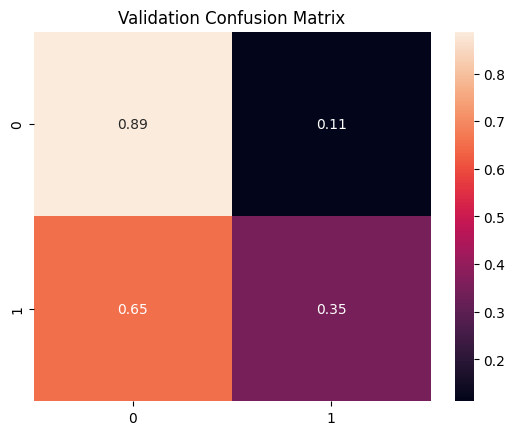

In [ ]:
plt.title('Validation Confusion Matrix')
sns.heatmap(cf, annot=True)

### This model has high probability of false negatives which are not good for company as people will end up getting Kicked.

### Creating dumb models to compare it with our decision tree model.

In [ ]:
def allNo(input):
  return np.full(len(input), 0)

In [ ]:
def randomGuess(input):
  return np.random.choice([1, 0], len(input))

In [ ]:
accuracy_score(val_targets, allNo(X_val))

0.8777266250137016

In [ ]:
accuracy_score(val_targets, randomGuess(X_val))

0.5054806532938726

### The dumb model which all the time predicts No is better than our decision tree model so we definitely need to do Hyperparameter tuning or shift to another model

In [ ]:
def test_params(**params):
    model = DecisionTreeClassifier(random_state=42, **params).fit(X_train, train_targets)
    train_Score = accuracy_score(train_targets, model.predict(X_train))
    val_Score = accuracy_score(val_targets, model.predict(X_val))
    cf_train = confusion_matrix(train_targets, model.predict(X_train), normalize= 'true')
    cf_val = confusion_matrix(val_targets, model.predict(X_val), normalize= 'true')
    return train_Score, val_Score, cf_train, cf_val

In [ ]:
test_params(max_depth=5)

(0.9007435555474359,
 0.901293434177354,
 array([[0.99449908, 0.00550092],
        [0.76634544, 0.23365456]]),
 array([[0.99375585, 0.00624415],
        [0.76243837, 0.23756163]]))

In [ ]:
test_params(max_leaf_nodes= 40)

(0.9016022069167108,
 0.9011838211114764,
 array([[0.9951867 , 0.0048133 ],
        [0.76426983, 0.23573017]]),
 array([[0.99369341, 0.00630659],
        [0.7628866 , 0.2371134 ]]))

### The accuracy have gone to 90% after tuning 2 parameters however, false negatives chances have increased.

In [ ]:
def test_param_and_plot(param_name, param_values, modelID=0):
    train_Score, val_Score = [], []
    for value in param_values:
        params = {param_name: value}
        if modelID==0:
          train, val, cfTrain, cfVal = test_params(**params)
        else:
          train, val, cfTrain, cfVal = test_params_randForest(**params)
        train_Score.append(train)
        val_Score.append(val)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_Score, 'b-o')
    plt.plot(param_values, val_Score, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('accuracy_score')
    plt.legend(['Training', 'Validation'])

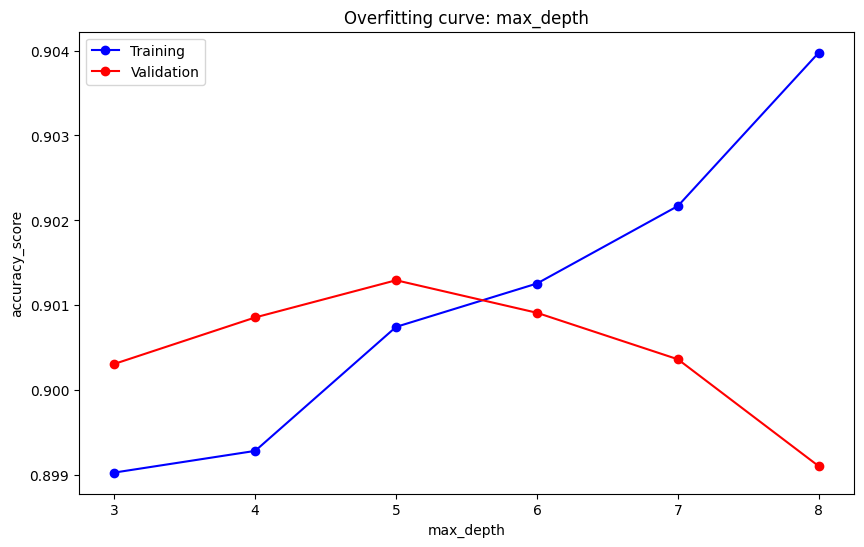

In [ ]:
test_param_and_plot('max_depth', [3, 4, 5, 6, 7, 8])

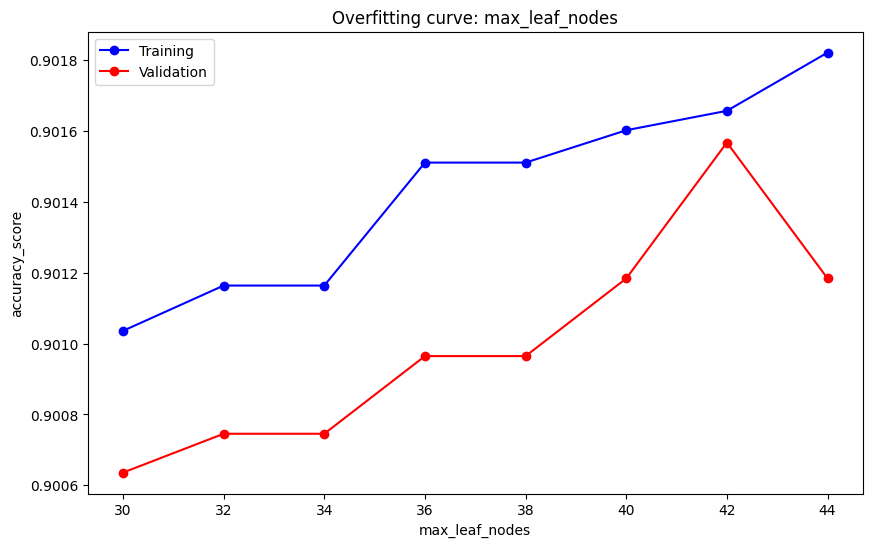

In [ ]:
test_param_and_plot('max_leaf_nodes', [30, 32, 34, 36, 38, 40, 42, 44])

In [ ]:
test_params(class_weight = {0 : 1, 1 : 3})

(1.0,
 0.8250575468595857,
 array([[1., 0.],
        [0., 1.]]),
 array([[0.8932251 , 0.1067749 ],
        [0.66427611, 0.33572389]]))

In [ ]:
test_params(max_depth = 5, max_leaf_nodes = 42, class_weight = {0 : 1, 1 : 3})

(0.897327219248406,
 0.8971829442069494,
 array([[0.9864144 , 0.0135856 ],
        [0.73654559, 0.26345441]]),
 array([[0.98507649, 0.01492351],
        [0.73375168, 0.26624832]]))

In [ ]:
test_params(max_depth = 5, max_leaf_nodes = 42)

(0.9007435555474359,
 0.901293434177354,
 array([[0.99449908, 0.00550092],
        [0.76634544, 0.23365456]]),
 array([[0.99375585, 0.00624415],
        [0.76243837, 0.23756163]]))

### Training best decision tree model

In [35]:
tree = DecisionTreeClassifier(random_state = 42, max_depth = 5, max_leaf_nodes= 42).fit(X_train, train_targets)

In [36]:
def model_predict(inputs_df, model):
  inputs_df[numeric_cols] = imputer.transform(inputs_df[numeric_cols])
  inputs_df[numeric_cols] = scalar.transform(inputs_df[numeric_cols])
  inputs_df[categorical_cols] = inputs_df[categorical_cols].fillna('unknown')
  inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])
  X_test = inputs_df[numeric_cols + encoded_cols].copy()
  predictions = model.predict(X_test)
  return predictions

In [ ]:
dtfeatureImp = pd.DataFrame({
    'feature' : X_train.columns.tolist(),
    'importance' : tree.feature_importances_
}).sort_values(by= 'importance', ascending= False).head(10)

In [ ]:
dtfeatureImp

,feature,importance
19,WheelType_unknown,0.689515
0,VehicleAge,0.098346
10,Auction_MANHEIM,0.095257
6,VNZIP1,0.043724
7,VehBCost,0.032408
2,MMRAcquisitionAuctionAveragePrice,0.012280
9,Auction_ADESA,0.007664
3,MMRAcquisitionRetailAveragePrice,0.005657
1,VehOdo,0.004477
43,IsOnlineSale_0,0.003318


In [ ]:
test_df = pd.read_csv('test.csv')

In [ ]:
test_df.drop(columns=['PRIMEUNIT', 'AUCGUART'], inplace=True)
test_df.drop(columns=irrelevant, inplace=True)
test_df.drop(columns=tooManyCategories, inplace=True)
test_df.drop(columns=['MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailCleanPrice'], inplace=True)

In [ ]:
test_df

,RefId,Auction,VehicleAge,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,MMRCurrentAuctionAveragePrice,MMRCurrentRetailAveragePrice,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
0,73015,ADESA,4,AUTO,Alloy,85377,AMERICAN,LARGE,GM,5032.0,5935.0,4905.0,8557.0,30212,6500.0,0,2152
1,73016,ADESA,4,AUTO,Alloy,61873,AMERICAN,MEDIUM,GM,4502.0,5362.0,4645.0,7562.0,30212,6300.0,0,1118
2,73017,ADESA,3,AUTO,Alloy,69283,AMERICAN,MEDIUM SUV,CHRYSLER,10244.0,11564.0,10883.0,15340.0,30212,9700.0,0,1215
3,73018,ADESA,7,AUTO,Alloy,87889,AMERICAN,MEDIUM,GM,2558.0,3263.0,2928.0,5725.0,30212,4150.0,0,1933
4,73019,ADESA,2,AUTO,NaN,73432,OTHER ASIAN,COMPACT,OTHER,5013.0,5914.0,5013.0,5914.0,30212,4100.0,0,920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48702,121742,MANHEIM,5,AUTO,Alloy,88645,AMERICAN,LARGE,FORD,5358.0,8987.0,5761.0,9764.0,33411,7955.0,0,1633
48703,121743,MANHEIM,3,AUTO,Covers,81862,TOP LINE ASIAN,COMPACT,OTHER,6849.0,10999.0,6856.0,10283.0,33411,7035.0,0,594
48704,121744,MANHEIM,4,AUTO,Covers,82451,OTHER ASIAN,MEDIUM,OTHER,4662.0,7972.0,4833.0,7871.0,33411,6335.0,0,594
48705,121745,MANHEIM,5,AUTO,Alloy,75760,OTHER ASIAN,MEDIUM,OTHER,5953.0,9137.0,5092.0,8576.0,33411,8055.0,0,1038


In [ ]:
test_preds = model_predict(test_df, tree)

In [ ]:
test_preds

array([0, 0, 0, ..., 0, 0, 0])

## Training 2nd model of random forest to see if it get us better results

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def test_params_randForest(**params):
    model = RandomForestClassifier(random_state=42, n_jobs= -1, **params).fit(X_train, train_targets)
    train_Score = accuracy_score(train_targets, model.predict(X_train))
    val_Score = accuracy_score(val_targets, model.predict(X_val))
    cf_train = confusion_matrix(train_targets, model.predict(X_train), normalize= 'true')
    cf_val = confusion_matrix(val_targets, model.predict(X_val), normalize= 'true')
    return train_Score, val_Score, cf_train, cf_val

In [ ]:
test_params_randForest()

(0.9999086541096516,
 0.9006357557820892,
 array([[1.00000000e+00, 0.00000000e+00],
        [7.41289844e-04, 9.99258710e-01]]),
 array([[0.99213238, 0.00786762],
        [0.75616316, 0.24383684]]))

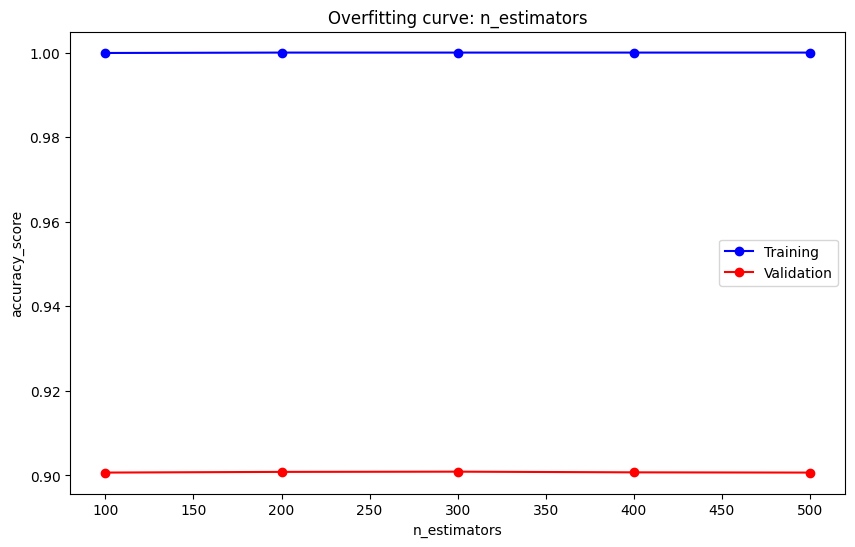

In [ ]:
test_param_and_plot('n_estimators', [100, 200, 300, 400, 500], modelID= 1)

### So n_estimators didn't have any impact on model.

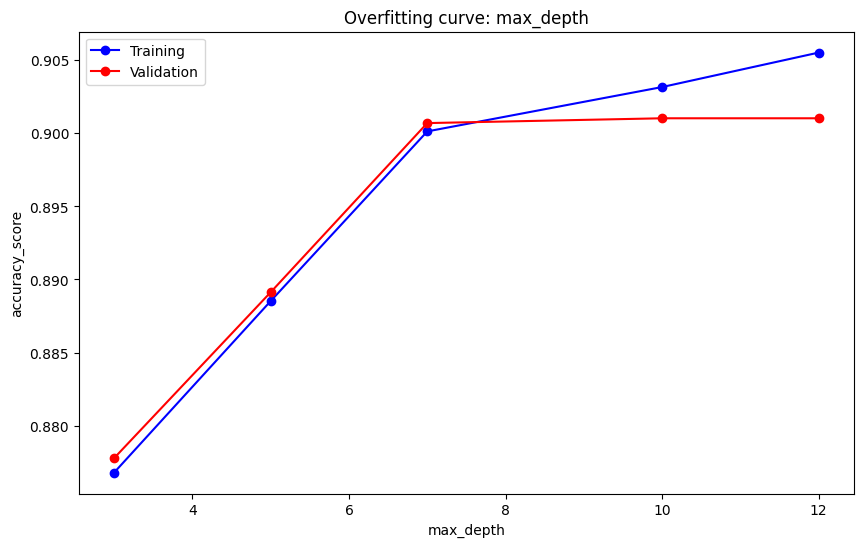

In [ ]:
test_param_and_plot('max_depth', [3, 5, 7, 10, 12], modelID= 1)

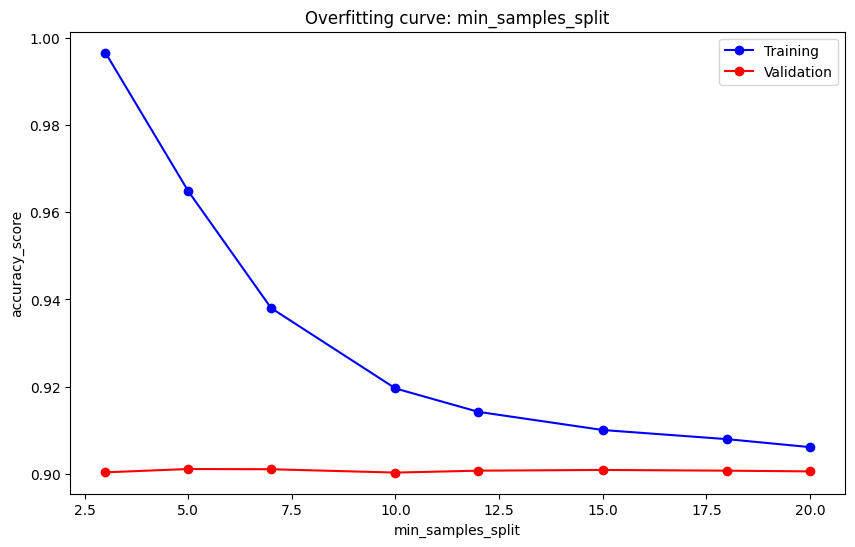

In [ ]:
test_param_and_plot('min_samples_split', [3, 5, 7, 10, 12, 15, 18, 20], modelID= 1)

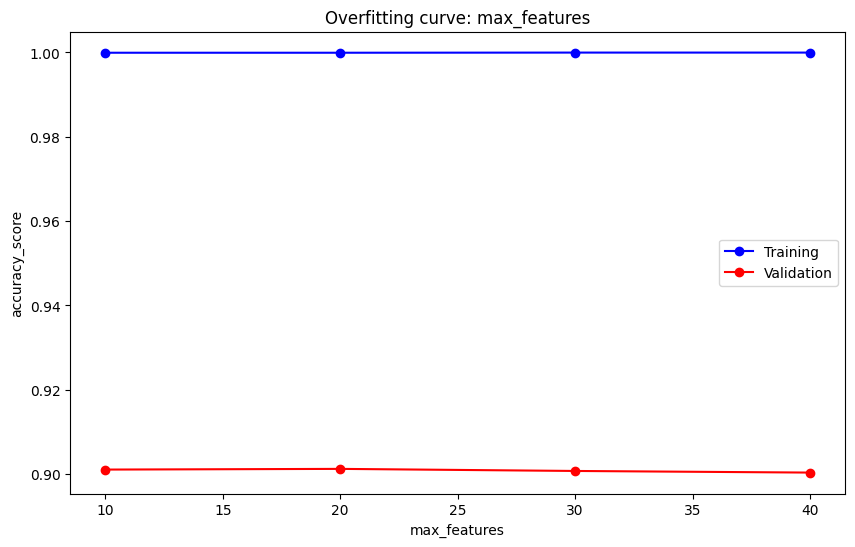

In [ ]:
test_param_and_plot('max_features', [10, 20, 30, 40], modelID= 1)

### No significant impact can be seen in visualizations of hyperparameters

In [38]:
rf_best = RandomForestClassifier(random_state= 42, n_jobs= -1).fit(X_train, train_targets)

In [ ]:
accuracy_score(train_targets, rf_best.predict(X_train))

0.9999086541096516

In [ ]:
accuracy_score(val_targets, rf_best.predict(X_val))

0.9006357557820892

In [ ]:
rffeatureImp = pd.DataFrame({
    'feature' : X_train.columns.tolist(),
    'importance' : rf_best.feature_importances_
}).sort_values(by= 'importance', ascending= False).head(10)

In [ ]:
rffeatureImp

,feature,importance
19,WheelType_unknown,0.107531
1,VehOdo,0.097974
7,VehBCost,0.095664
4,MMRCurrentAuctionAveragePrice,0.092651
2,MMRAcquisitionAuctionAveragePrice,0.092484
5,MMRCurrentRetailAveragePrice,0.091757
3,MMRAcquisitionRetailAveragePrice,0.089884
6,VNZIP1,0.075517
8,WarrantyCost,0.063417
0,VehicleAge,0.037401


In [ ]:
test_predictions = model_predict(test_df, rf_best)

In [ ]:
test_predictions

array([0, 0, 0, ..., 0, 0, 0])

## In conclusion, Random forest did not give any better results than decision tree, they both were more or less the same.

In [ ]:
submission = pd.read_csv('example_entry.csv')

In [ ]:
submission

,RefId,IsBadBuy
0,73015,0
1,73016,0
2,73017,0
3,73018,0
4,73019,0
...,...,...
48702,121742,0
48703,121743,0
48704,121744,0
48705,121745,0


In [ ]:
submission['IsBadBuy'] = test_preds

In [ ]:
submission

,RefId,IsBadBuy
0,73015,0
1,73016,0
2,73017,0
3,73018,0
4,73019,1
...,...,...
48702,121742,0
48703,121743,0
48704,121744,0
48705,121745,0


In [ ]:
submission.to_csv('example_entry.csv', index=None)

In [39]:
import joblib

In [40]:
Dont_get_kicked = {
    'tree': tree,
    'rf_best': rf_best,
    'imputer': imputer,
    'scalar': scalar,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [41]:
joblib.dump(Dont_get_kicked, 'Dont_get_kicked.joblib')

['Dont_get_kicked.joblib']

In [44]:
import jovian
jovian.commit(outputs=['Dont_get_kicked.joblib'])

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.
